# ROC Curve Exploration


In this Python notebook we investigate the Properties of the ROC Curve

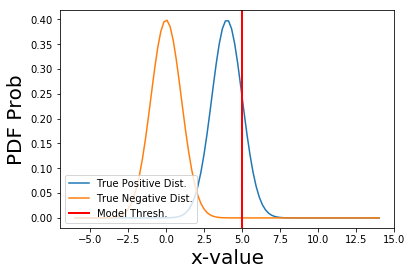

---------------------------
Model Metrics: 
Accuracy:  0.574
Precision:  1.0
Recall:  0.148
F1 Score:  0.257839721254
---------------------------


In [7]:
import subroutines as sr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

mu_neg = 0.0
mu_pos = 4.0
sig_neg = 1.0
sig_pos = 1.0
Threshold = 5.0

Npos_s = 10000
Nneg_s = 10000


### Here we plot the actual PDFs of the true positive and true negative distributions
x = np.linspace(mu_pos - 10*sig_pos, mu_pos + 10*sig_pos, 100)
plt.plot(x,mlab.normpdf(x, mu_pos, sig_pos),label='True Positive Dist.')
plt.plot(x,mlab.normpdf(x, mu_neg, sig_neg),label='True Negative Dist.')
plt.axvline(x=Threshold,linewidth=2,color="r",label='Model Thresh.')
plt.xlabel("x-value",size=20)
plt.ylabel("PDF Prob",size=20)
plt.legend(loc=3)
plt.show()

# Create the Model
Dist1 = sr.ROC(mu_neg,sig_neg,mu_pos,sig_pos)

# Generate a Samples from the Model and Extract the samples and the labels from the data
X_sample = Dist1.generate_samples(Npos_s,Nneg_s)

vec_samples = [X_sample[i][0] for i in range(len(X_sample))]
vec_sample_labels = [X_sample[i][1] for i in range(len(X_sample))]

# Now we classify all data using the threshold parameter
vec_classifier_labels = Dist1.classify(vec_samples,Threshold)

# Compute all of the confusion matrix elements based on the model with speciic threshold
m11,m12,m21,m22 = Dist1.confusion_matrix(vec_samples,vec_sample_labels,vec_classifier_labels)

# Compute the Metrics of the models
acc,prec,recall,F1_score = Dist1.classification_metrics(m11,m12,m21,m22)

print '---------------------------'
print 'Model Metrics: '
print 'Accuracy: ', acc
print 'Precision: ', prec
print 'Recall: ', recall
print 'F1 Score: ', F1_score
print '---------------------------'

# The Area Under The ROC Curve

100


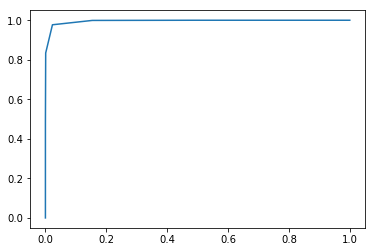

---------------------------
The Area under the curve: 
0.995892425
---------------------------


In [9]:
# Now we plot the ROC Curve for our data

import matplotlib.pyplot as plt


# Generate the ROC Curve data from min threshold to max threshold 
ROC_data = Dist1.ROC_curve(vec_samples,vec_sample_labels,tmin=-50.0,tmax=50.0,dt=1.0)

print len(ROC_data)
t = [ROC_data[i][0] for i in range(len(ROC_data))]
TP_t = [ROC_data[i][1] for i in range(len(ROC_data))]
TP_t = TP_t/np.max(TP_t)

FP_t = [ROC_data[i][2] for i in range(len(ROC_data))]
FP_t = FP_t/np.max(FP_t)
#plt.plot(t,TP_t)
#plt.plot(t,FP_t)
plt.plot(FP_t,TP_t)
plt.show()



print '---------------------------'
print "The Area under the curve: "
print abs(np.trapz(TP_t,FP_t))
print '---------------------------'